Objective : To understand how the students scores are affected by other variables like :Gender,Ethnicity,Parental level of Education,Lunch,Test preparation score .

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Students = pd.read_csv("StudentsPerformance.csv")
Students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print(Students.tail())

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


In [4]:
print(Students.shape)

(1000, 8)


In [5]:
print(Students.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [6]:
print(Students.describe)

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [7]:
print(Students.describe(include="all"))

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000

In [8]:
print(Students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [9]:
print(Students.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [10]:
Students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
print(Students.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [12]:
print(Students["math score"].value_counts())
print(Students["reading score"].value_counts())
print(Students["writing score"].value_counts())

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64
74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing score, Length: 77, dtype: int64


In [13]:
Students.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
print(Students["gender"].unique())
print(Students["race/ethnicity"].unique())
print(Students["lunch"].unique())
print(Students["test preparation course"].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
['standard' 'free/reduced']
['none' 'completed']


In [15]:
print(Students.sort_values(["math score","reading score","writing score"]))

     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
980  female        group B                 high school  free/reduced   
17   female        group B            some high school  free/reduced   
787  female        group B                some college      standard   
145  female        group C                some college  free/reduced   
..      ...            ...                         ...           ...   
625    male        group D                some college      standard   
149    male        group E          associate's degree  free/reduced   
458  female        group E           bachelor's degree      standard   
916    male        group E           bachelor's degree      standard   
962  female        group E          associate's degree      standard   

    test preparation course  math score  reading score  writing score  
59                     none           0             17         

In [16]:
print(Students.groupby("test preparation course").mean())
print(Students.groupby("test preparation course").agg(["count","mean","min","max"]))

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673
                        math score                     reading score  \
                             count       mean min  max         count   
test preparation course                                                
completed                      358  69.695531  23  100           358   
none                           642  64.077882   0  100           642   

                                            writing score                      
                              mean min  max         count       mean min  max  
test preparation course                                                        
completed                73.893855  37  100           358  74.418994  36  100  
none                     66.534268  17  100           6

In [17]:
Students.groupby("gender").mean()
print(Students.groupby("gender").agg(["count","mean","min","max"]))

       math score                     reading score                      \
            count       mean min  max         count       mean min  max   
gender                                                                    
female        518  63.633205   0  100           518  72.608108  17  100   
male          482  68.728216  27  100           482  65.473029  23  100   

       writing score                      
               count       mean min  max  
gender                                    
female           518  72.467181  10  100  
male             482  63.311203  15  100  


In [18]:
Students.groupby("lunch").mean()
print(Students.groupby("lunch").agg(["count","mean","min","max"]))

             math score                     reading score                      \
                  count       mean min  max         count       mean min  max   
lunch                                                                           
free/reduced        355  58.921127   0  100           355  64.653521  17  100   
standard            645  70.034109  19  100           645  71.654264  26  100   

             writing score                      
                     count       mean min  max  
lunch                                           
free/reduced           355  63.022535  10  100  
standard               645  70.823256  22  100  


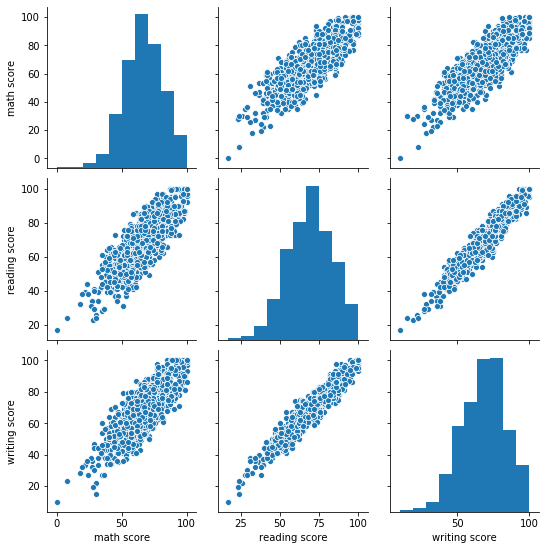

In [20]:
print(sns.pairplot(Students))

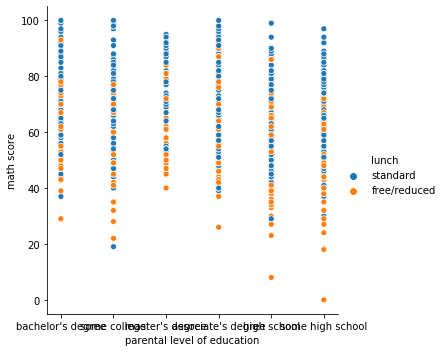

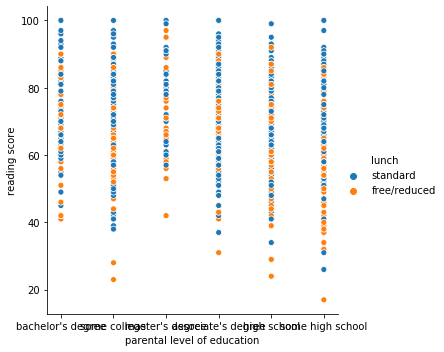

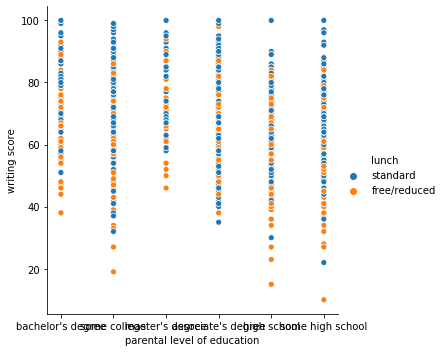

In [21]:
print(sns.relplot(x="parental level of education",y ="math score",hue="lunch",data=Students))
print(sns.relplot(x="parental level of education",y="reading score",hue="lunch",data=Students))
print(sns.relplot(x="parental level of education",y="writing score",hue="lunch",data=Students))

We can observe that there is not much affect of parental level of education on scores

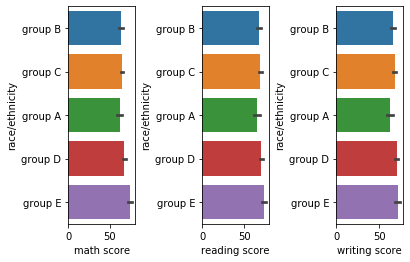

In [22]:
plt.subplots_adjust(left=None,right=None,bottom=None,top=None,wspace=1,hspace=0.3)
plt.subplot(131)
sns.barplot(y="race/ethnicity",x="math score",data=Students)
plt.subplot(132)
sns.barplot(x="reading score",y="race/ethnicity",data=Students)
plt.subplot(133)
sns.barplot(x="writing score",y="race/ethnicity",data=Students)

plt.show()

We can observe that there is not much affect of race/ethnicity on scores of students.
AS THERE IS NOT MUCH AFFECT , WE CAN REMOVE BOTH "PARENTAL LEVEL OF EDUCATION" AND "RACE/ETHNICITY" COLUMNS FROM DATA FOR MAKING DATA MORE EASIER TO OBSERVE.

In [23]:
Student = Students.drop(["race/ethnicity","parental level of education"],axis=1)
print(Student.head())

   gender         lunch test preparation course  math score  reading score  \
0  female      standard                    none          72             72   
1  female      standard               completed          69             90   
2  female      standard                    none          90             95   
3    male  free/reduced                    none          47             57   
4    male      standard                    none          76             78   

   writing score  
0             74  
1             88  
2             93  
3             44  
4             75  


AxesSubplot(0.125,0.125;0.775x0.755)


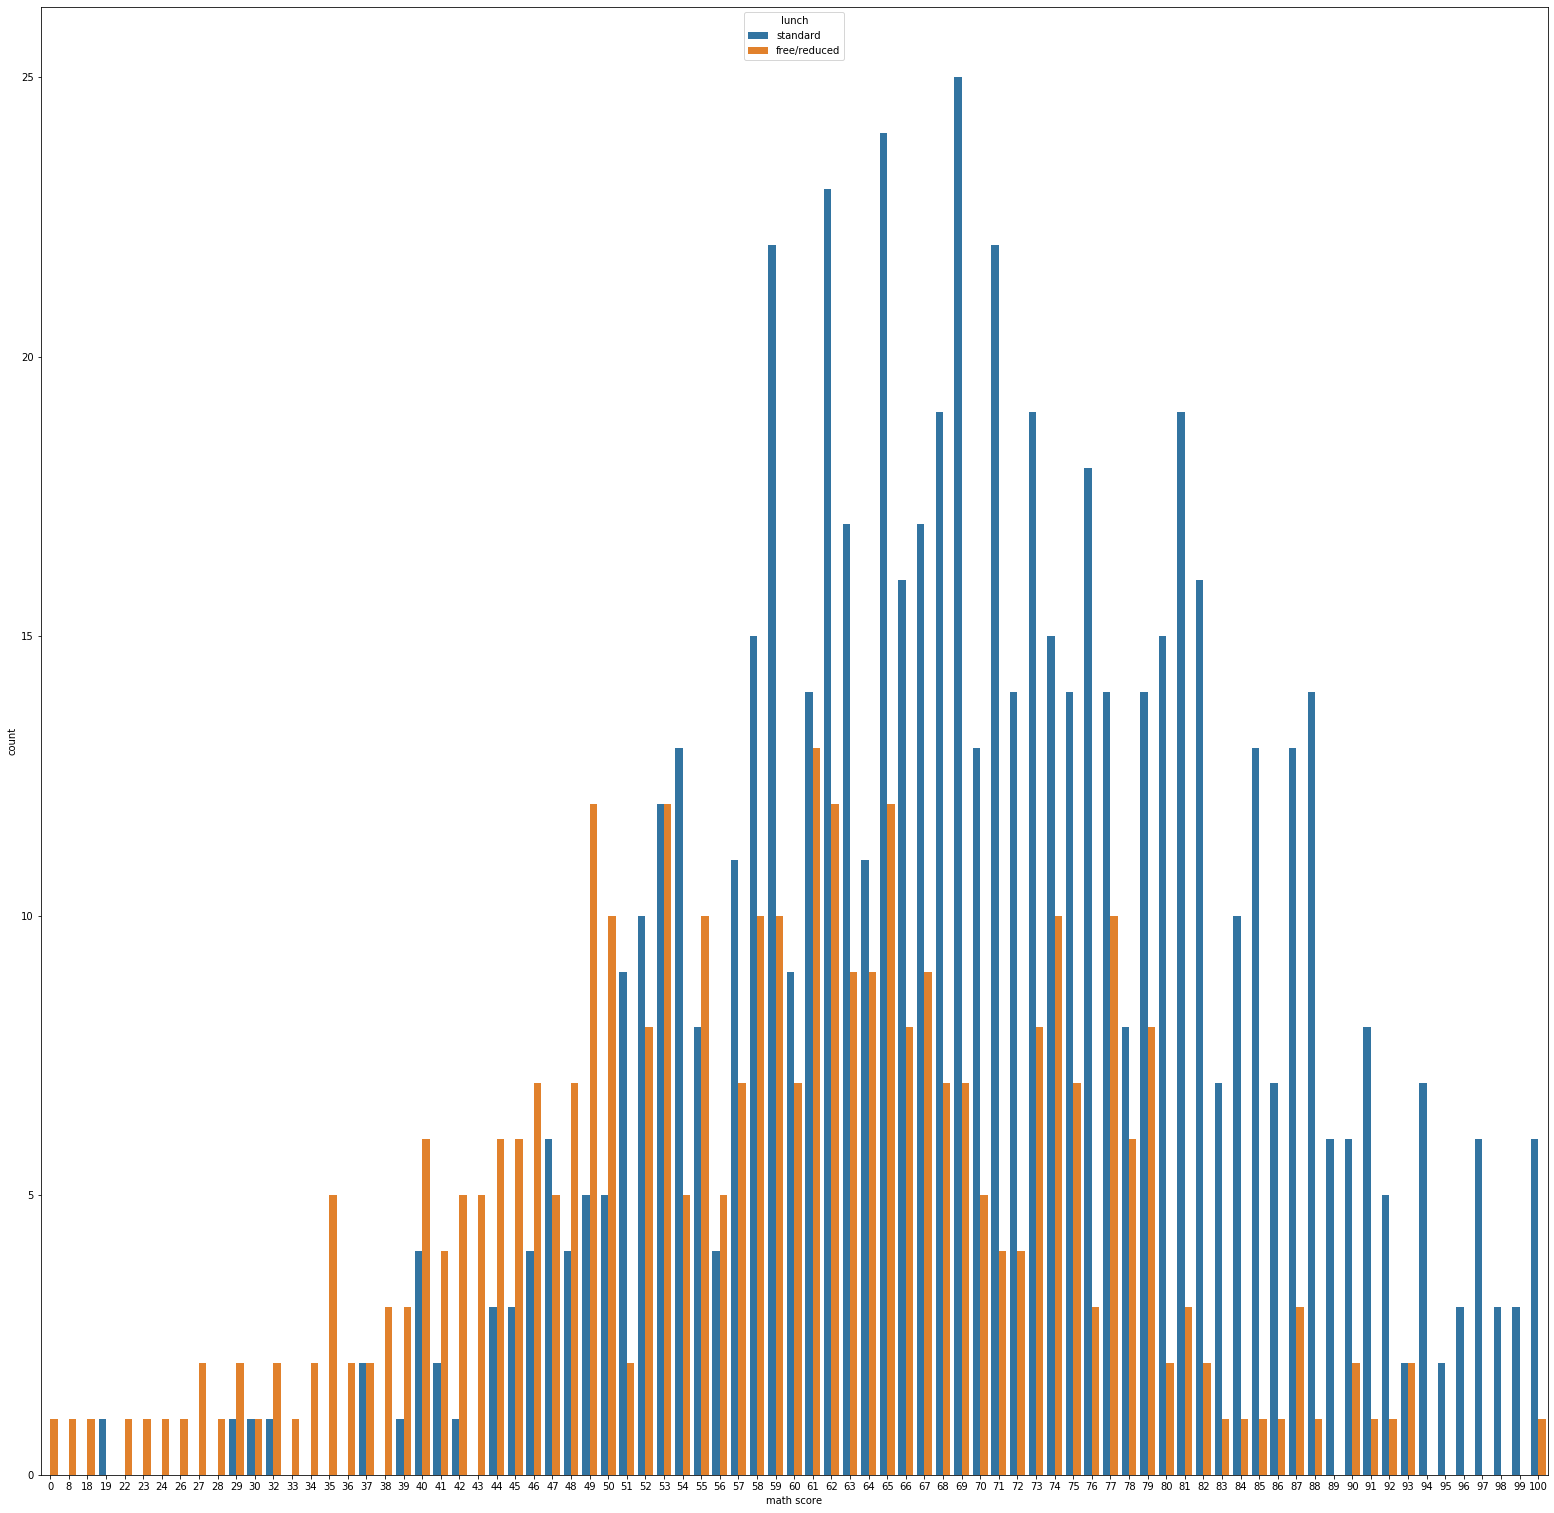

In [24]:
fig_dims=(27,27)
fig,ax=plt.subplots(figsize=fig_dims)
print(sns.countplot(x="math score", data=Student,hue='lunch',ax=ax))

We can observe that most of students are scoring between 60-80 and for understanding the affect of lunch we will take an example:
let's take a writing score i.e. 63 in it blue bar is higher than orange one it means frequency of students who are scoring 63 is higher for those who are having standard lunch.It simply means that students who are having standard lunch are scoring more than those who are having free/reduced.

AxesSubplot(0.125,0.125;0.775x0.755)


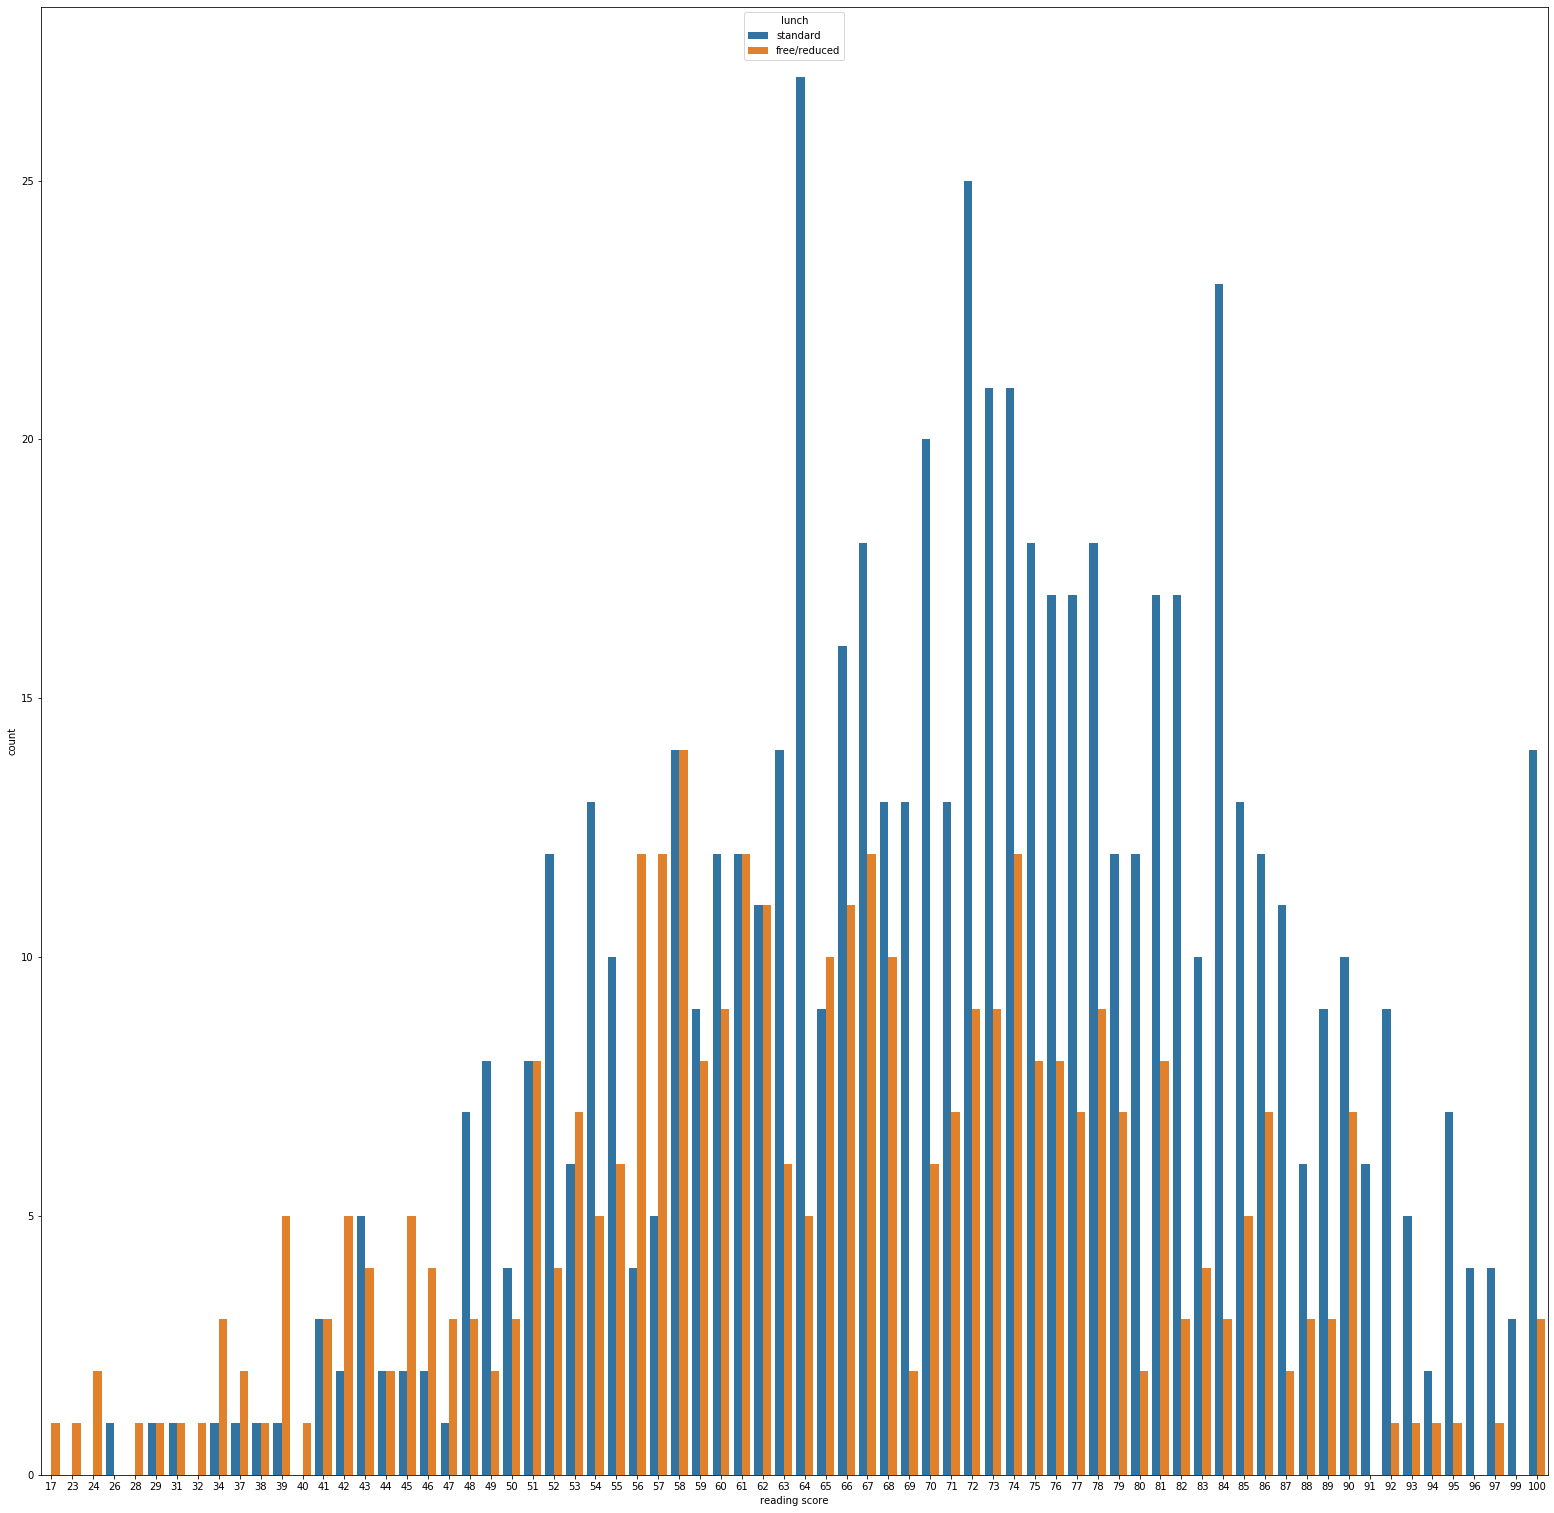

In [25]:
fig_dims=(27,27)
fig,ax=plt.subplots(figsize=fig_dims)
print(sns.countplot(x="reading score", data=Student,hue='lunch',ax=ax))

We can observe that most of students are scoring between 60-80 and for understanding the affect of lunch we will take an example:
let's take a writing score i.e. 63 in it blue bar is higher than orange one it means frequency of students who are scoring 63 is higher for those who are having standard lunch.It simply means that students who are having standard lunch are scoring more than those who are having free/reduced.

AxesSubplot(0.125,0.125;0.775x0.755)


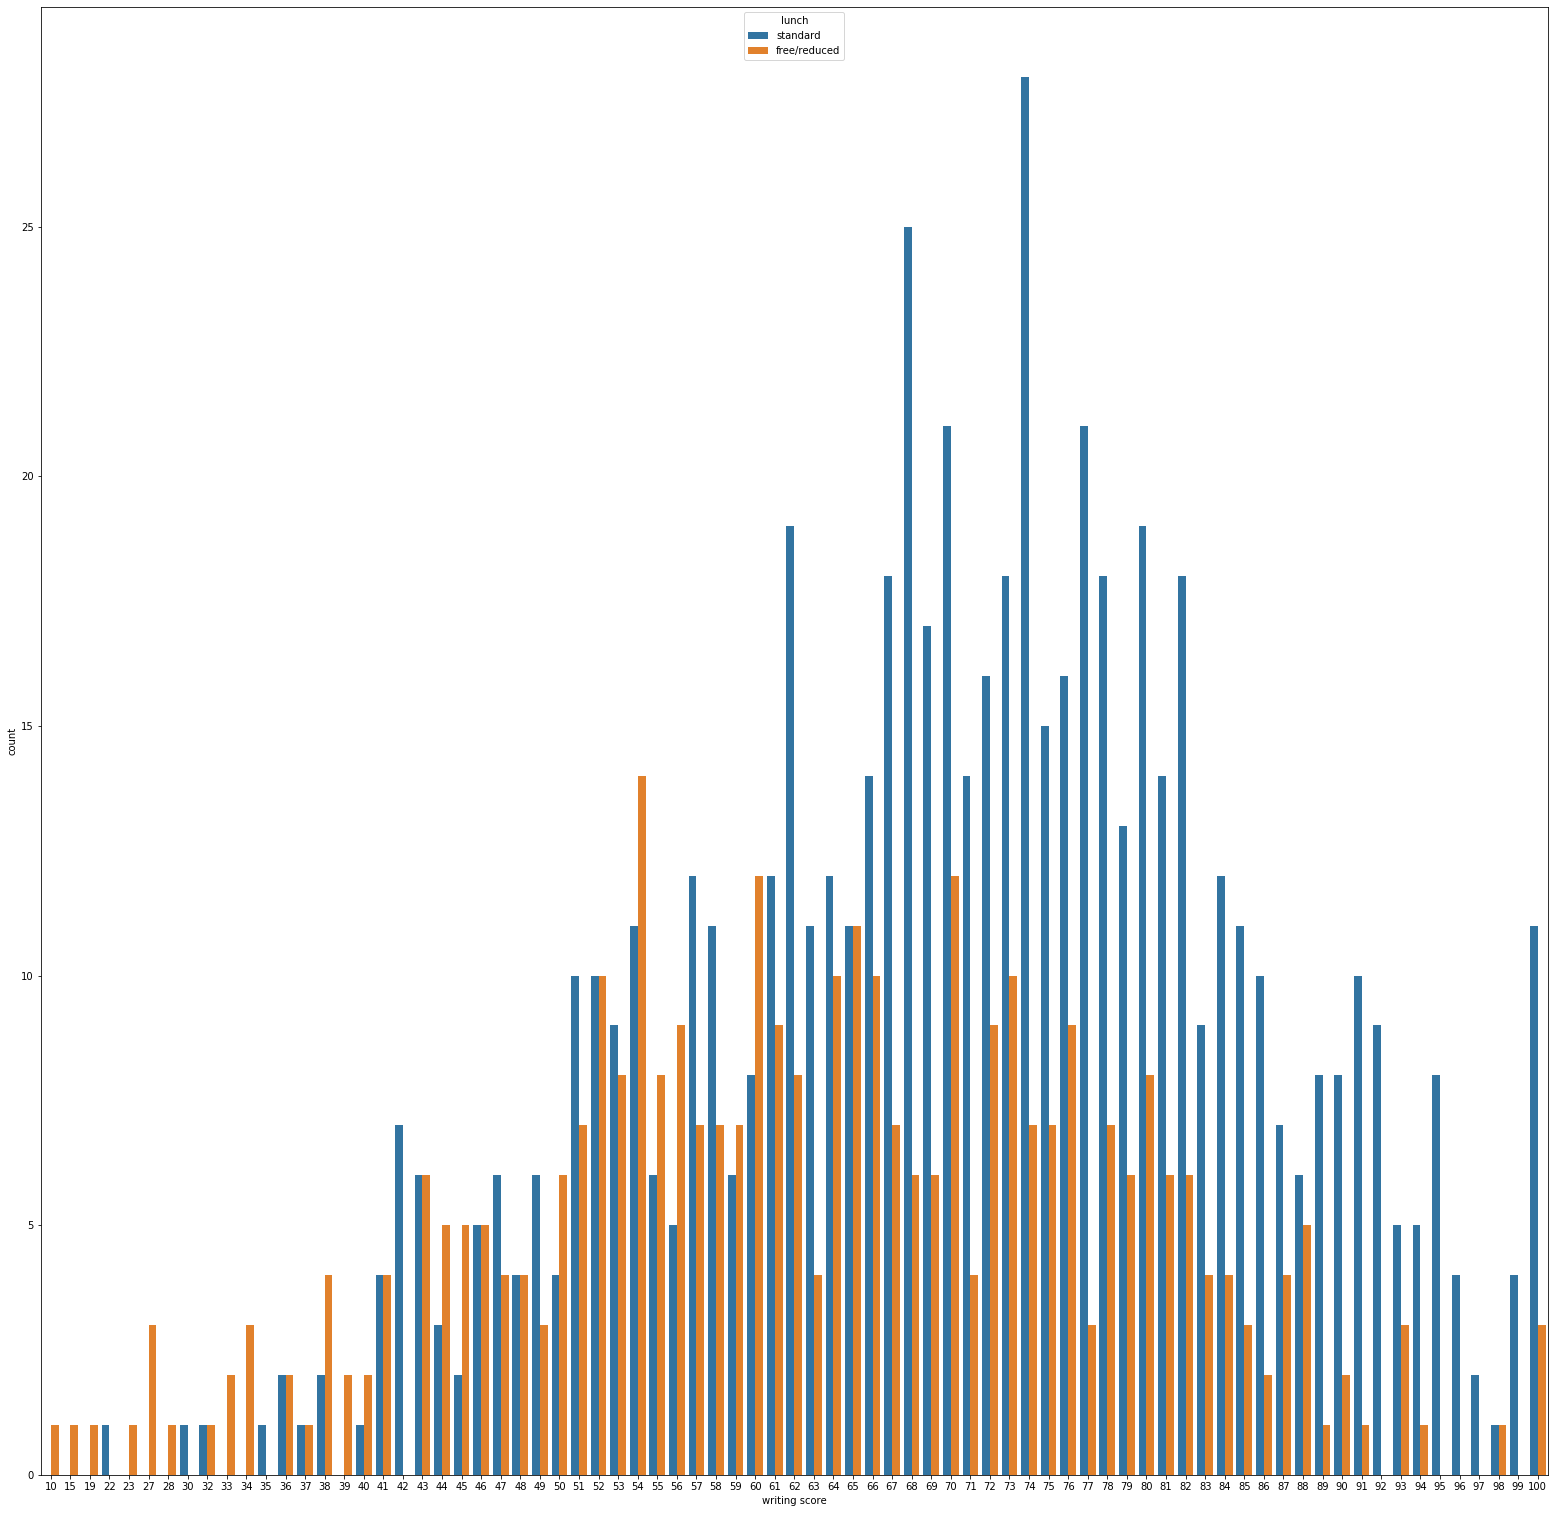

In [26]:
fig_dims=(27,27)
fig,ax=plt.subplots(figsize=fig_dims)
print(sns.countplot(x="writing score", data=Student,hue='lunch',ax=ax))

We can observe that most of students are scoring between 60-80 and for understanding the affect of lunch we will take an example:
let's take a writing score i.e. 63 in it blue bar is higher than orange one it means frequency of students who are scoring 63 is higher for those who are having standard lunch.It simply means that students who are having standard lunch are scoring more than those who are having free/reduced.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


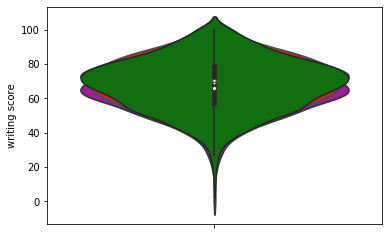

In [27]:
print(sns.violinplot(y="math score",data=Student,color="m",linewidth=2))
print(sns.violinplot(y="reading score",data=Student,color="r",linewidth=2))
print(sns.violinplot(y="writing score",data=Student,color="g",linewdith=2))

From this graph we observed,
Students having scores between 0-20 < Students having scores between 80-100 < Students having scores between 60-80 range


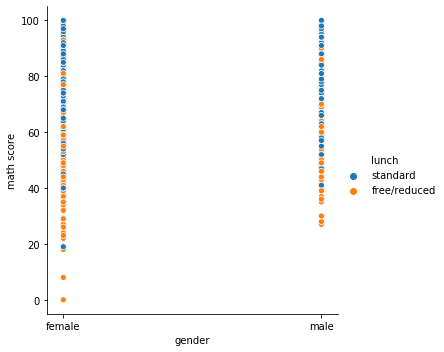

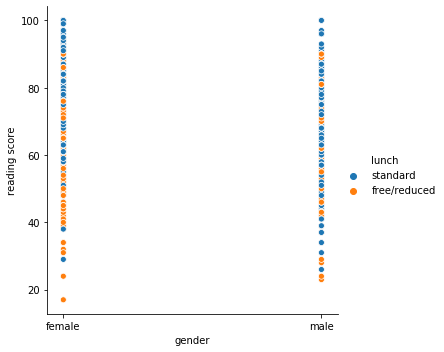

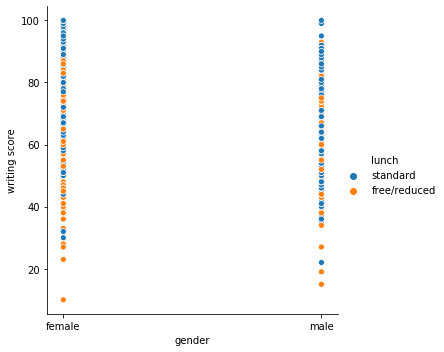

In [28]:
print(sns.relplot(x="gender",y ="math score",hue="lunch",data=Student))
print(sns.relplot(x="gender",y="reading score",hue="lunch",data=Student))
print(sns.relplot(x="gender",y="writing score",hue="lunch",data=Student))

In the above graph relationship between three variables is observed which are lunch,gender, scores in three subjects :
In maths and reading some of the females are scoring less than 20 but on the other hand ,all males are scoring more than 20 and we can also say that females who are not having standard lunch are scoring low as compared to those who are having standard lunch and on the other side males are not that affected by what type lunch they are having.

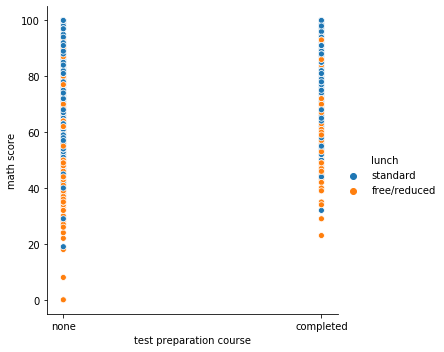

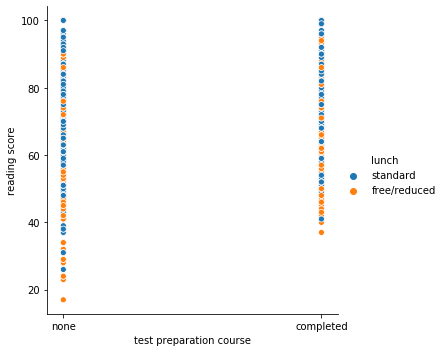

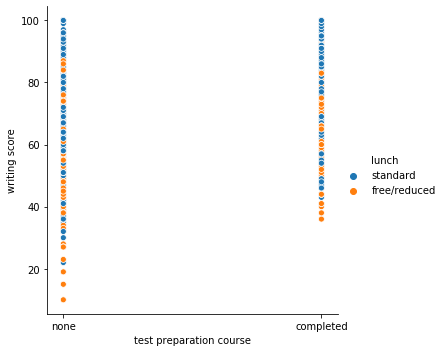

In [29]:
print(sns.relplot(x="test preparation course",y ="math score",hue="lunch",data=Student))
print(sns.relplot(x="test preparation course",y="reading score",hue="lunch",data=Student))
print(sns.relplot(x="test preparation course",y="writing score",hue="lunch",data=Student))

 Dependency of scores on test preparation course is that the students who prepared for test scored above 20 but some of the students who were not prepared for the test scored less than 20. 

AxesSubplot(0.125,0.125;0.775x0.755)


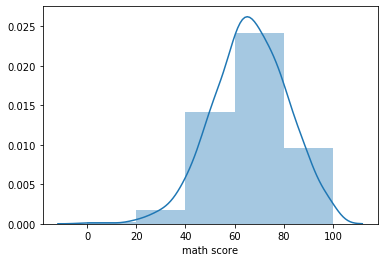

In [30]:
print(sns.distplot(Student["math score"],bins=5))

According to this graph most of the students are having scores between 60-80 in maths. 

AxesSubplot(0.125,0.125;0.775x0.755)


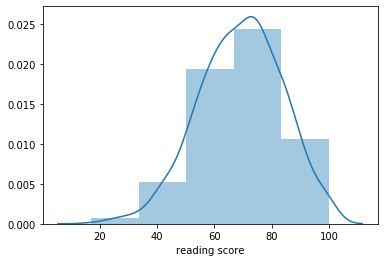

In [31]:
print(sns.distplot(Student["reading score"],bins=5))

According to this graph,most of the Students are having scores between 70-80 and 60-80

AxesSubplot(0.125,0.125;0.775x0.755)


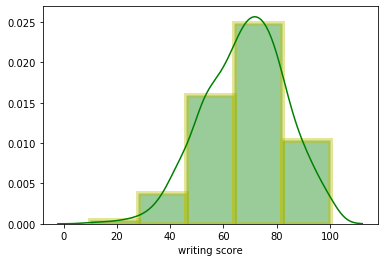

In [32]:
print(sns.distplot(Student["writing score"],kde=True,norm_hist=False,bins=5,hist_kws=dict(edgecolor="y",linewidth="5"),color="Green"))

According to this graph,most of the students are having scores between 63-80 in writing.

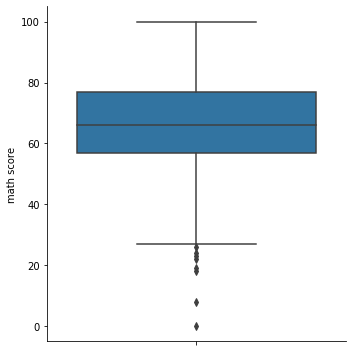

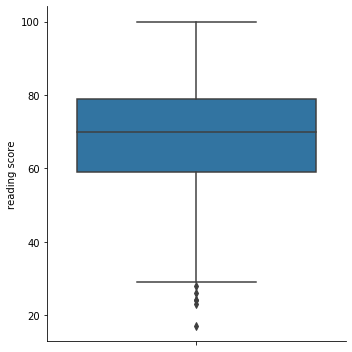

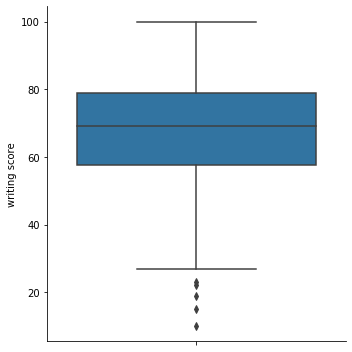

In [33]:
print(sns.catplot(y="math score",kind="box",data=Student))
print(sns.catplot(y="reading score",kind="box",data=Student))
print(sns.catplot(y="writing score",kind ="box",data=Student))

I used box plot for identifying any outliers present.
According to these three graphs ,in all three subjects most of the students are scoring marks between 58-78 or 60-80 and some students are also having marks between 0-30 , but no outliers are present.

AxesSubplot(0.125,0.125;0.62x0.755)


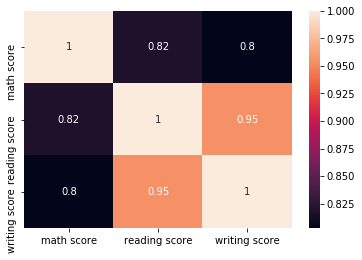

In [34]:
corelation=Student.corr()
print(sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True))

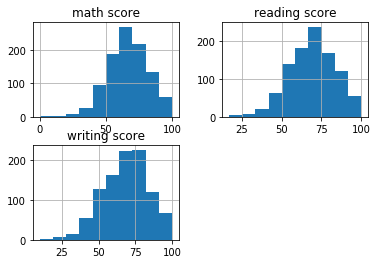

In [35]:
stud=pd.DataFrame(Student,columns=["math score","reading score","writing score",'gender',  'lunch',
       'test preparation course'])
stud.hist()
plt.show()

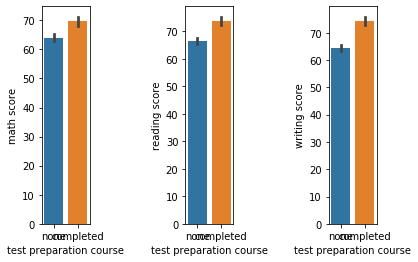

In [36]:
plt.subplots_adjust(left=None,right=None,bottom=None,top=None,wspace=2,hspace=0.5)
plt.subplot(131)
sns.barplot(x="test preparation course",y="math score",data=Student)
plt.subplot(132)
sns.barplot(y="reading score",x="test preparation course",data=Student)
plt.subplot(133)
sns.barplot(y="writing score",x="test preparation course",data=Student)

plt.show()

According to these graphs,Students who prepared for the test are getting higher scores than the others who are not prepared.  

AxesSubplot(0.125,0.125;0.775x0.755)


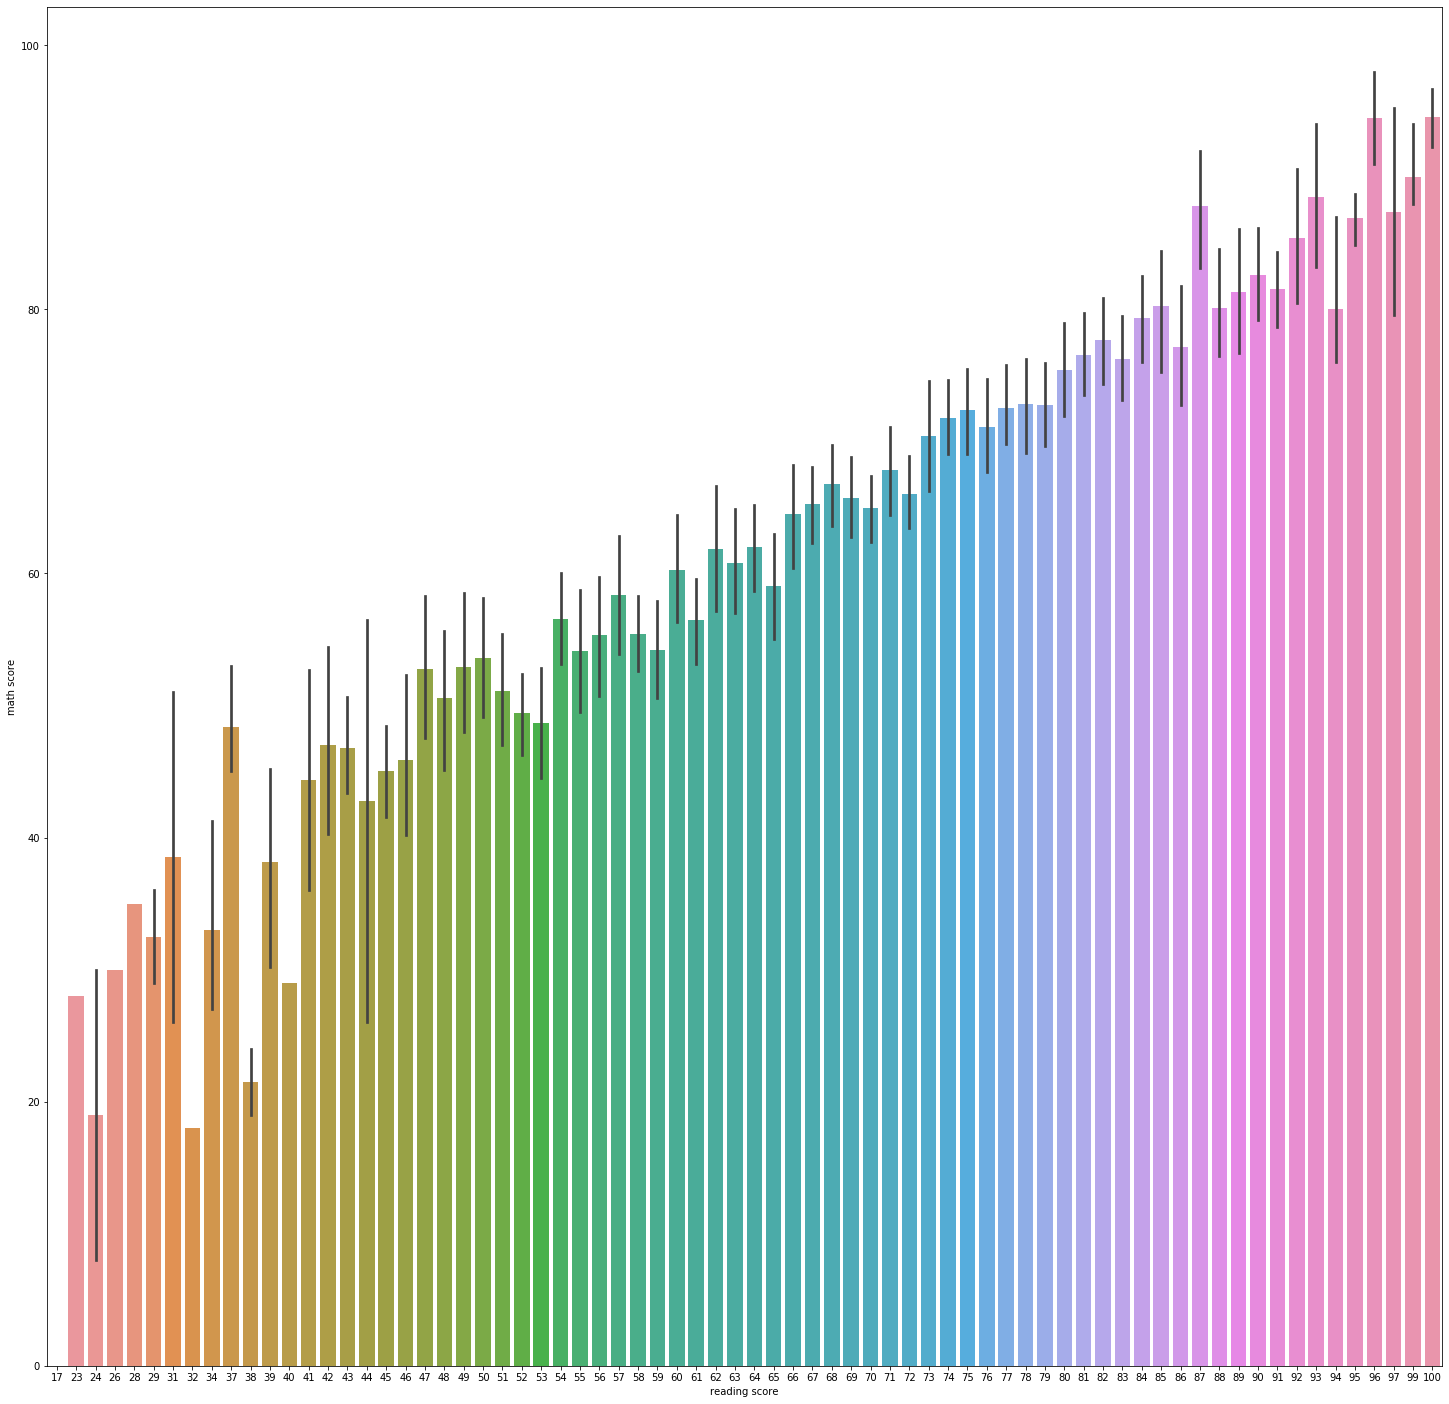

In [37]:
fig_dims=(25,25)
fig,ax=plt.subplots(figsize=fig_dims)
print(sns.barplot(x="reading score",y="math score",data=Student,ax=ax))


AxesSubplot(0.125,0.125;0.775x0.755)


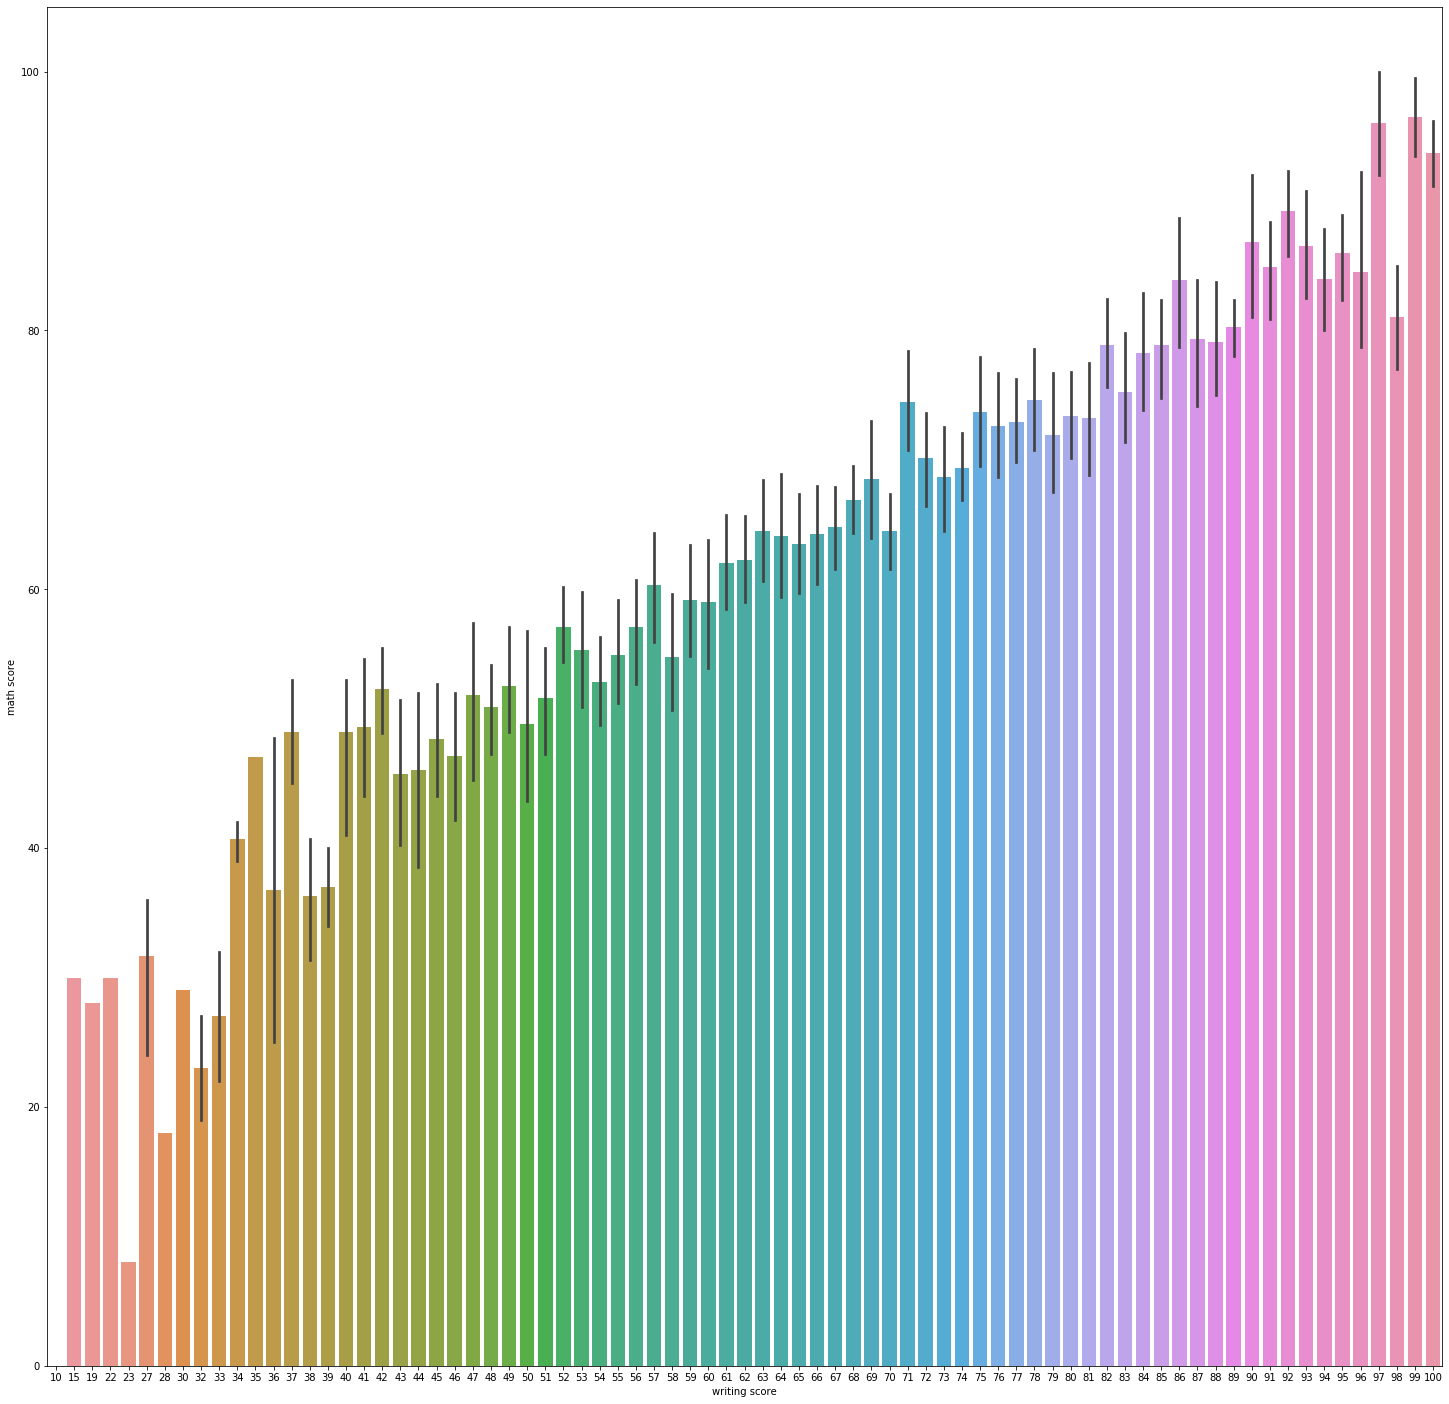

In [38]:
fig_dims=(25,25)
fig,ax=plt.subplots(figsize=fig_dims)
print(sns.barplot(x="writing score",y="math score",data=Student,ax=ax))


# CONCLUSION :
# Affect of gender : In maths and reading some females scored less than 20 but males scored above 20. So we can say there is a little affect of gender on scores.
# Affect of race/ethnicity : There is not much affect of this variable on scores of student as observed from the graphs above
# Affect of parental level of education : There is not much affect of this variable on scores of student as observed from the graphs above
# Affect of lunch : The students who are having standard lunch are scoring higher than those who are having free/reduced lunch.Females are more affected due to types of lunch they are having as we have seen that some of the females having free/reduced lunch are scoring less.
# Affect of test preparation course : Students who are prepared for test are scoring higher than who are not prepared.
